In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Import dataset

In [19]:
data = pd.read_csv('..\data\cinemaTicket_Ref.csv')
data.head()

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day
0,1492,304,3900000,26,0,4,4.26,150000.0,26,610.328638,2018-05-05,5,2,5
1,1492,352,3360000,42,0,5,8.08,80000.0,42,519.801980,2018-05-05,5,2,5
2,1492,489,2560000,32,0,4,20.00,80000.0,32,160.000000,2018-05-05,5,2,5
3,1492,429,1200000,12,0,1,11.01,100000.0,12,108.991826,2018-05-05,5,2,5
4,1492,524,1200000,15,0,3,16.67,80000.0,15,89.982004,2018-05-05,5,2,5


# Data Imputation

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142524 entries, 0 to 142523
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   film_code     142524 non-null  int64  
 1   cinema_code   142524 non-null  int64  
 2   total_sales   142524 non-null  int64  
 3   tickets_sold  142524 non-null  int64  
 4   tickets_out   142524 non-null  int64  
 5   show_time     142524 non-null  int64  
 6   occu_perc     142399 non-null  float64
 7   ticket_price  142524 non-null  float64
 8   ticket_use    142524 non-null  int64  
 9   capacity      142399 non-null  float64
 10  date          142524 non-null  object 
 11  month         142524 non-null  int64  
 12  quarter       142524 non-null  int64  
 13  day           142524 non-null  int64  
dtypes: float64(3), int64(10), object(1)
memory usage: 15.2+ MB


In [21]:
data.isnull().sum()

film_code         0
cinema_code       0
total_sales       0
tickets_sold      0
tickets_out       0
show_time         0
occu_perc       125
ticket_price      0
ticket_use        0
capacity        125
date              0
month             0
quarter           0
day               0
dtype: int64

In [22]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy="mean")
imputer.fit(data[['occu_perc', 'capacity']])
data[['occu_perc', 'capacity']] = imputer.transform(data[['occu_perc', 'capacity']])
data.isnull().sum()

film_code       0
cinema_code     0
total_sales     0
tickets_sold    0
tickets_out     0
show_time       0
occu_perc       0
ticket_price    0
ticket_use      0
capacity        0
date            0
month           0
quarter         0
day             0
dtype: int64

# Encode Categorical Data

In [23]:
data['date'] = pd.to_datetime(data['date'])
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day
data['date'] = data['date'].dt.year
data.rename(columns={'date': 'year'}, inplace=True)

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142524 entries, 0 to 142523
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   film_code     142524 non-null  int64  
 1   cinema_code   142524 non-null  int64  
 2   total_sales   142524 non-null  int64  
 3   tickets_sold  142524 non-null  int64  
 4   tickets_out   142524 non-null  int64  
 5   show_time     142524 non-null  int64  
 6   occu_perc     142524 non-null  float64
 7   ticket_price  142524 non-null  float64
 8   ticket_use    142524 non-null  int64  
 9   capacity      142524 non-null  float64
 10  year          142524 non-null  int32  
 11  month         142524 non-null  int32  
 12  quarter       142524 non-null  int64  
 13  day           142524 non-null  int32  
dtypes: float64(3), int32(3), int64(8)
memory usage: 13.6 MB


In [25]:
data.head()

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,year,month,quarter,day
0,1492,304,3900000,26,0,4,4.26,150000.0,26,610.328638,2018,5,2,5
1,1492,352,3360000,42,0,5,8.08,80000.0,42,519.801980,2018,5,2,5
2,1492,489,2560000,32,0,4,20.00,80000.0,32,160.000000,2018,5,2,5
3,1492,429,1200000,12,0,1,11.01,100000.0,12,108.991826,2018,5,2,5
4,1492,524,1200000,15,0,3,16.67,80000.0,15,89.982004,2018,5,2,5


# Choose significant features

<Axes: >

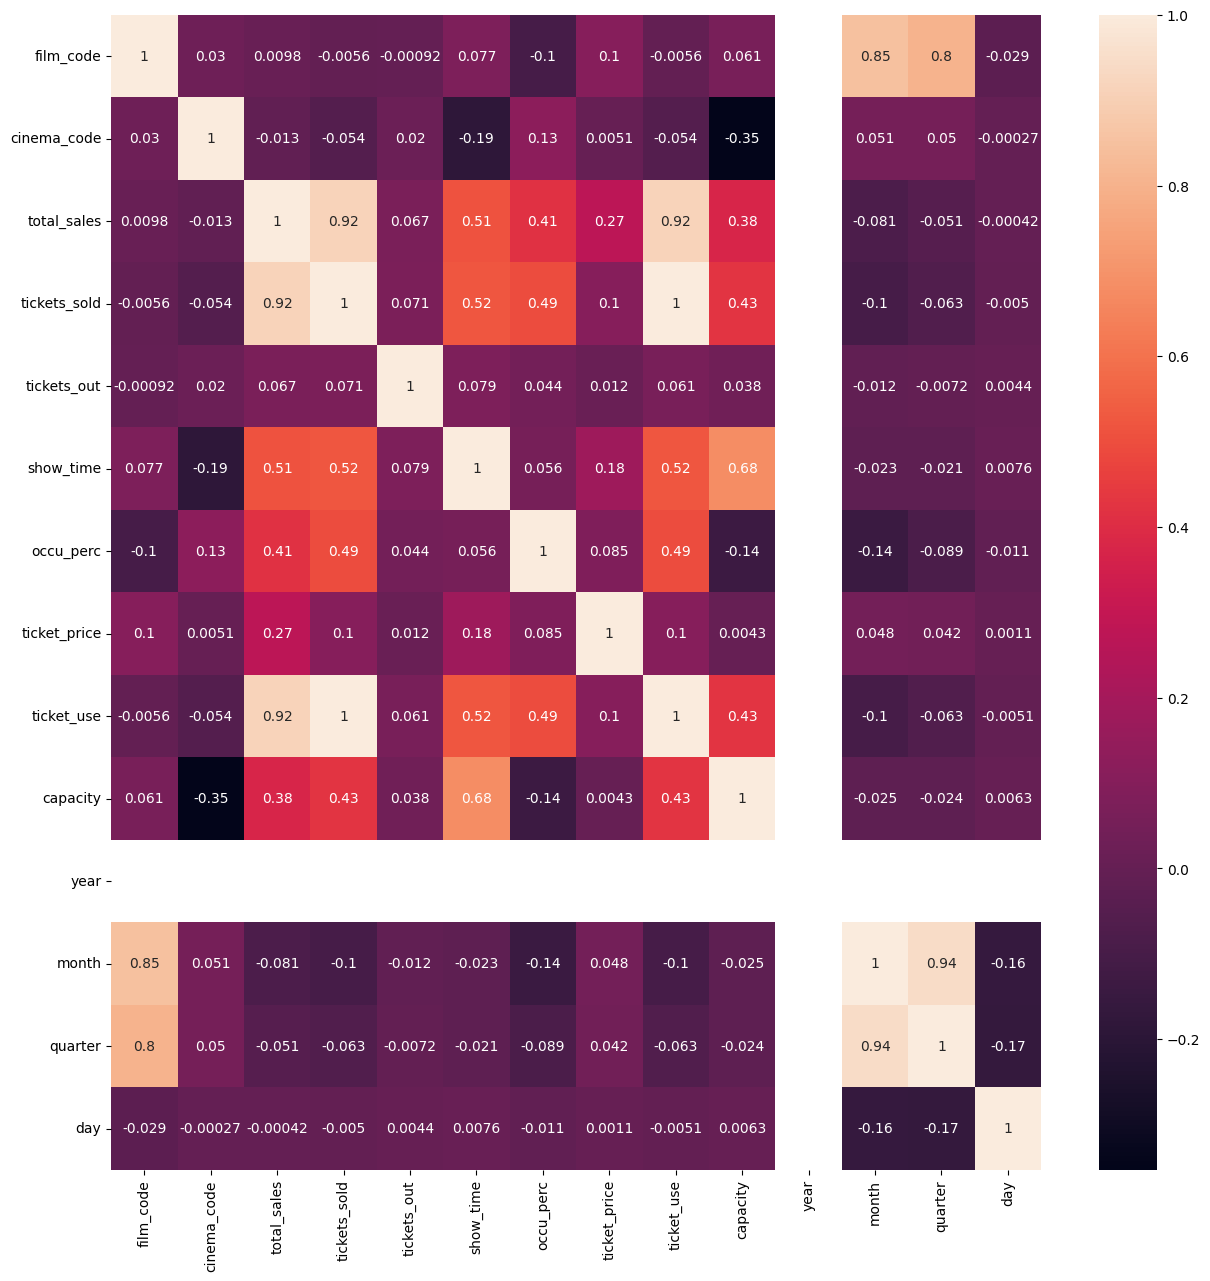

In [26]:
plt.figure(figsize=(15, 15))
sns.heatmap(data.corr(), annot=True)

In [27]:
data.columns

Index(['film_code', 'cinema_code', 'total_sales', 'tickets_sold',
       'tickets_out', 'show_time', 'occu_perc', 'ticket_price', 'ticket_use',
       'capacity', 'year', 'month', 'quarter', 'day'],
      dtype='object')

In [28]:
features = ["tickets_sold", "show_time", "occu_perc", "ticket_price", "ticket_use", "capacity"]
X = data[features]
y = data["total_sales"]

# Spitting the dataset

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

In [30]:
X_train

,tickets_sold,show_time,occu_perc,ticket_price,ticket_use,capacity
65275,24,6,1.25,100000.000000,24,1920.000000
11918,133,2,23.54,84323.308271,133,564.995752
124977,218,3,53.43,80000.000000,218,408.010481
52790,61,2,9.08,70000.000000,61,671.806167
61315,835,13,60.25,88670.658683,835,1385.892116
...,...,...,...,...,...,...
41993,296,5,17.46,60000.000000,296,1695.303551
97639,2,1,0.52,120000.000000,2,384.615385
95939,99,2,18.82,50000.000000,99,526.036132
117952,153,1,57.52,37908.496732,153,265.994437


# Feature Scaling

In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:] = sc.fit_transform(X_train[:]) 
X_test[:] = sc.transform(X_test[:]) 

C:\Users\Admin\AppData\Local\Temp\ipykernel_19360\2937380043.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.41323202 -0.02633823  0.27536793 ... -0.1470207   0.04465145
  0.43864421]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train[:] = sc.fit_transform(X_train[:])
C:\Users\Admin\AppData\Local\Temp\ipykernel_19360\2937380043.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.67783555 -0.63394983 -0.30600349 ... -0.63394983 -0.96189618
  1.00578189]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train[:] = sc.fit_transform(X_train[:])
C:\Users\Admin\AppData\Local\Temp\ipykernel_19360\2937380043.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.4126538  -0.025521 

In [32]:
X_train

,tickets_sold,show_time,occu_perc,ticket_price,ticket_use,capacity
65275,-0.413232,0.677836,-0.825380,0.562509,-0.412654,1.115728
11918,-0.026338,-0.633950,0.157415,0.091061,-0.025521,-0.303946
124977,0.275368,-0.306003,1.475304,-0.038955,0.276372,-0.468423
52790,-0.281901,-0.633950,-0.480145,-0.339687,-0.281242,-0.192038
61315,2.465400,2.973460,1.776006,0.221800,2.467756,0.556129
...,...,...,...,...,...,...
41993,0.552228,0.349889,-0.110660,-0.640419,0.553402,0.880307
97639,-0.491321,-0.961896,-0.857566,1.163973,-0.490791,-0.492935
95939,-0.147021,-0.633950,-0.050696,-0.941151,-0.146278,-0.344765
117952,0.044651,-0.961896,1.655637,-1.304781,0.045513,-0.617217


In [33]:
X_test

,tickets_sold,show_time,occu_perc,ticket_price,ticket_use,capacity
115677,-0.342242,-0.306003,-0.645487,-1.214543,-0.341620,-0.030992
30581,-0.296099,-0.306003,0.316144,1.100661,-0.295448,-0.675861
20436,-0.171867,-0.306003,2.059072,2.066169,-0.171140,-0.751327
134415,0.207928,0.677836,0.196215,-0.038955,0.208890,-0.042108
80751,-0.487771,-0.633950,-0.818766,-0.941151,-0.487239,-0.671394
...,...,...,...,...,...,...
91050,0.009157,0.021943,-0.486318,-0.038955,0.009996,0.779987
131574,-0.125724,1.333728,-0.432085,1.980246,-0.124968,0.185817
77262,0.392501,0.021943,0.430781,0.799740,0.393577,-0.011645
135945,0.907176,0.021943,1.977063,1.963647,0.908570,-0.255728


# Build model

In [34]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,StackingRegressor
from sklearn.model_selection import RandomizedSearchCV,cross_val_score
random_states = range(1, 101)
best_score = -np.inf
best_random_state = None
for random_state in random_states:
    model = StackingRegressor(
    estimators=[('dt', DecisionTreeRegressor(random_state=random_state)), ('rf', RandomForestRegressor(random_state=random_state))],
    final_estimator=DecisionTreeRegressor(random_state=random_state)
    )
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
    mean_score = scores.mean()
    if mean_score > best_score:
        best_score = mean_score
        best_random_state = random_state
model = StackingRegressor(
    estimators=[
        ('dt', DecisionTreeRegressor(random_state=best_random_state)),
        ('rf', RandomForestRegressor(random_state=best_random_state))
    ],
    final_estimator=DecisionTreeRegressor(random_state=best_random_state)
)
param_dist = {
    'final_estimator__criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'final_estimator__max_features': ['auto', 'sqrt', 'log2'],
    'final_estimator__max_depth': [None, 10, 20, 50, 100],
    'final_estimator__min_samples_split': [2, 5, 10],
    'final_estimator__min_samples_leaf': [1, 2, 4, 8],
}
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=2,
    random_state=best_random_state
)
random_search.fit(X_train, y_train)
best_model = random_search.best_estimator_

In [ ]:
best_model

In [ ]:

y_pred = best_model.predict(X_test)
results_df = pd.DataFrame({
    'y_test': y_test.values,
    'y_pred': y_pred,
})
print(results_df)

## Errors caculating

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error, root_mean_squared_error
from sklearn.model_selection import cross_val_score 
r2 = r2_score(y_test, y_pred)
print("r_2 score: ", r2) 
mse = mean_squared_error(y_test,y_pred)
print("Mean squared error: ", mse)
rmse = root_mean_squared_error(y_test, y_pred)
print("Root mean squared error: ", rmse)
mape = mean_absolute_percentage_error(y_test, y_pred)
print("Mean absolute percentage error: ", mape)
score = cross_val_score(model, X, y, cv = 5, scoring = 'r2')
print('Cross val score: ', score, score.mean(), score.std()) 

In [ ]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r', linestyle = '--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted values')
plt.show() 